## csv 파일을 로드해서 결합
1. csv 풀더에 transaction_1, transaction_2, transaction_detail_1, transaction_detail_2 파일 4래를 로드
2. transaction_1, transaction_2 데이터프레임을 단순한 행 결합
3. transaction_detail_1, transaction_detail_2  데이터프레임도 단순한 행 결합
4. 2번과정에서 나온 데이터프레임과 3번과정에서 나온 데이터프레임을 특정 조건을 가지고 열 결합

In [1]:
import pandas as pd

In [9]:
tr1 = pd.read_csv("../csv/transaction_1.csv")
tr2 = pd.read_csv("../csv/transaction_2.csv")
tr3 = pd.read_csv("../csv/transaction_detail_1.csv")
tr4 = pd.read_csv("../csv/transaction_detail_2.csv")

tr1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [21]:
## 데이터프레임 행 추가 단순 결합

tr5 = pd.concat([tr1,tr2],axis="rows",ignore_index=True)
tr5.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [13]:
tr6 = pd.concat([tr3,tr4],axis="rows",ignore_index=True)

In [24]:
# 특정 조건을 가지고 열 결합

tr7 = pd.merge(tr5,tr6, on = "transaction_id", how = "inner")
tr7.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [26]:
## payment_date 시계열 데이터 변환


tr7["payment_date"] =  pd.to_datetime(tr7["payment_date"])



In [28]:
tr7.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


## 데이터결합
1. customer_master, item_master 파일 로드
2. tr7 특정 조건에 마젝 열추가
3. 결합이 된 데이터에서 quantity컬럼, item_price컬럼 존재 두개의 곱을 하여 새로운 파생변수 total_price생성

In [40]:
tr7.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [38]:
cm = pd.read_csv("../csv/customer_master.csv")
im= pd.read_csv("../csv/item_master.csv")


cm.head()


,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [39]:
im.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [46]:
dm = pd.merge(tr7,cm, on = "customer_id", how = "inner" )

dm.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,T0000000162,50000,2019-02-02 18:23:27,PL563502,49,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
2,T0000000235,50000,2019-02-04 19:53:45,PL563502,127,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
3,T0000006088,50000,2019-07-10 10:48:25,PL563502,6291,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
4,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시


In [53]:
om = pd.merge(dm,im, on = "item_id", how = "left" )

om.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,T0000000162,50000,2019-02-02 18:23:27,PL563502,49,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-A,50000
2,T0000000235,50000,2019-02-04 19:53:45,PL563502,127,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-A,50000
3,T0000006088,50000,2019-07-10 10:48:25,PL563502,6291,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-A,50000
4,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000


In [56]:
## om 파생변수 생성 -> quantity * item_price

om["total_price"] =  om["quantity"] * om["item_price"]

om.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,T0000000162,50000,2019-02-02 18:23:27,PL563502,49,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-A,50000,50000
2,T0000000235,50000,2019-02-04 19:53:45,PL563502,127,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-A,50000,50000
3,T0000006088,50000,2019-07-10 10:48:25,PL563502,6291,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-A,50000,50000
4,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000


In [51]:
import numpy as np

In [57]:
## payment_month 새로운 파생변수 생성 - > payment_date에서 년과 월만 추출해서 값을 삽입

om["payment_month"] = om["payment_date"].dt.strftime("%Y-%m")
om.head()


,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,2019-02
1,T0000000162,50000,2019-02-02 18:23:27,PL563502,49,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-A,50000,50000,2019-02
2,T0000000235,50000,2019-02-04 19:53:45,PL563502,127,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-A,50000,50000,2019-02
3,T0000006088,50000,2019-07-10 10:48:25,PL563502,6291,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-A,50000,50000,2019-07
4,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000,2019-02


In [58]:
## payment_month기준으로 그룹화 하여서 om의 합을 추출

from tokenize import group


group_data = om.groupby("payment_month").sum()["total_price"]
group_data

payment_month
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: total_price, dtype: int64

In [61]:
import matplotlib.pyplot as plt

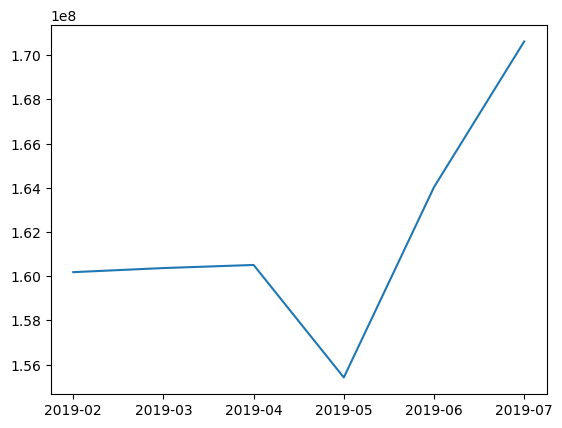

In [65]:
plt.plot(group_data)
plt.show()